In [50]:
import pandas as pd

from sklearn import tree
from sklearn import model_selection

import seaborn as sns

import numpy as np

In [3]:
train_df = pd.read_csv('titanic_train.csv')

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
# preprocessing

X = train_df.drop(labels=['PassengerId', 'Survived', 'Name', 'Cabin'], axis=1)
X = pd.get_dummies(X)

X.Age = X.Age.median()

y = train_df.Survived

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y,
    test_size=.33,
    random_state=42
)

In [12]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)

print(f'Train {clf.score(X_train, y_train)}')
print(f'Test {clf.score(X_test, y_test)}')

Train 0.8137583892617449
Test 0.8101694915254237


In [13]:
max_depths = range(1, 100)

In [33]:
scores_df = pd.DataFrame()

In [34]:
for max_depth in max_depths:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    cross_val_score = model_selection.cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    tmp_df = pd.DataFrame({
        'max_depth': [max_depth],
        'train_score': [train_score],
        'test_score': [test_score],
        'cross_val_score': [cross_val_score]
    })
    
    scores_df = scores_df.append(tmp_df)

scores_df

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.793624,0.772881,0.765154
0,3,0.813758,0.810169,0.780238
0,4,0.830537,0.800000,0.786905
0,5,0.843960,0.796610,0.800364
...,...,...,...,...
0,95,0.988255,0.820339,0.800378
0,96,0.988255,0.800000,0.797031
0,97,0.988255,0.806780,0.793669
0,98,0.988255,0.813559,0.800406


In [37]:
grouped = scores_df.melt(
    id_vars=['max_depth'],
    value_vars=['train_score', 'test_score', 'cross_val_score'],
    var_name='set_type',
    value_name='score'
)

<AxesSubplot:xlabel='max_depth', ylabel='score'>

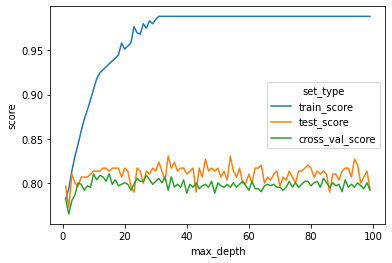

In [38]:
sns.lineplot(data=grouped, hue='set_type', x='max_depth', y='score')

## Выберите все подходящие ответы из списка
Упрощение модели препятствует переобучению

Переобученная модель - модель, погрязшая в особенностях тренировочного датасэта, вместо вникания в общие закономерности

Чем сложнее закономерности в данных, тем более сложная нужна модель для их поиска

Уменьшить переобученность поможет больший объём данных

In [39]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [41]:
model_selection.cross_val_score(clf, X_test, y_test, cv=5).mean()

0.8

## Выберите один вариант из списка

train dataset используется для тренировки модели, validation - для её проверки, тестовый датасет выступает как ещё один уровень проверки, которая происходит на не показанных модели ранее данных

## Выберите один вариант из списка

2

In [42]:
iris_df = pd.read_csv('train_iris.csv')

iris_df

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2
...,...,...,...,...,...,...
95,147,6.5,3.0,5.2,2.0,2
96,124,6.7,3.3,5.7,2.1,2
97,123,6.3,2.7,4.9,1.8,2
98,146,6.3,2.5,5.0,1.9,2


In [58]:
res_df = pd.DataFrame()

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    iris_df.drop(labels=['species'], axis=1),
    iris_df.species,
    test_size=.33,
    random_state=42
)

np.random.seed(0)

for max_depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    
    res_df = res_df.append(pd.DataFrame({
        'max_depth': [max_depth],
        'train_score': [clf.score(X_train, y_train)],
        'test_score': [clf.score(X_test, y_test)]
    }))

res_df

,max_depth,train_score,test_score
0,1,0.716418,0.666667
0,2,1.000000,0.909091
0,3,1.000000,0.909091
0,4,1.000000,0.909091
0,5,1.000000,0.969697
...,...,...,...
0,95,1.000000,0.969697
0,96,1.000000,0.969697
0,97,1.000000,0.909091
0,98,1.000000,0.909091


<AxesSubplot:xlabel='max_depth', ylabel='score'>

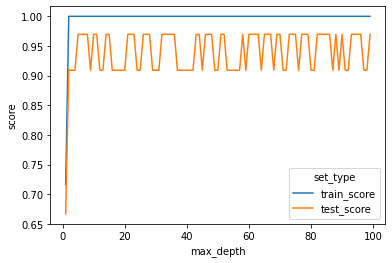

In [59]:
grouped = res_df.melt(
    id_vars=['max_depth'],
    value_vars=['train_score', 'test_score'],
    var_name='set_type',
    value_name='score'
)
sns.lineplot(data=grouped, x='max_depth', y='score', hue='set_type')

## Обработайте индивидуальный набор данных за отведённое время

In [64]:
dogs_and_cats_df = pd.read_csv('dogs_n_cats.csv')
dogs_and_cats_df = pd.get_dummies(dogs_and_cats_df)

dogs_and_cats_df

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид_котик,Вид_собачка
0,15,18.0,1,1,0,0,1
1,20,24.0,1,0,0,0,1
2,34,40.8,1,1,0,0,1
3,26,31.2,1,1,0,0,1
4,16,19.2,1,1,0,0,1
...,...,...,...,...,...,...,...
995,8,3.2,1,0,1,1,0
996,7,2.8,1,0,1,1,0
997,6,2.4,1,0,1,1,0
998,7,2.8,1,0,1,1,0


In [70]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    dogs_and_cats_df.drop(labels=['Вид_котик', 'Вид_собачка'], axis=1),
    dogs_and_cats_df['Вид_котик'],
    test_size=.33,
    random_state=42
)

In [71]:
res_df = pd.DataFrame()

for max_depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)

    res_df = res_df.append(pd.DataFrame({
        'max_depth': [max_depth],
        'train_score': [clf.score(X_train, y_train)],
        'test_score': [model_selection.cross_val_score(clf, X_test, y_test, cv=5).mean()]
    }))

res_df

,max_depth,train_score,test_score
0,1,1.0,1.0
0,2,1.0,1.0
0,3,1.0,1.0
0,4,1.0,1.0
0,5,1.0,1.0
...,...,...,...
0,95,1.0,1.0
0,96,1.0,1.0
0,97,1.0,1.0
0,98,1.0,1.0


In [75]:
test_df = pd.read_json('dataset_209691_15.txt')

print(f'Cats {np.count_nonzero(clf.predict(test_df) == 1)}')
print(f'Dogs {np.count_nonzero(clf.predict(test_df) == 0)}')

Cats 52
Dogs 48
